#### Roll No: 31251

# Assignment-6
### Data Analytics III
#### 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
#### 2.	Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Histplots

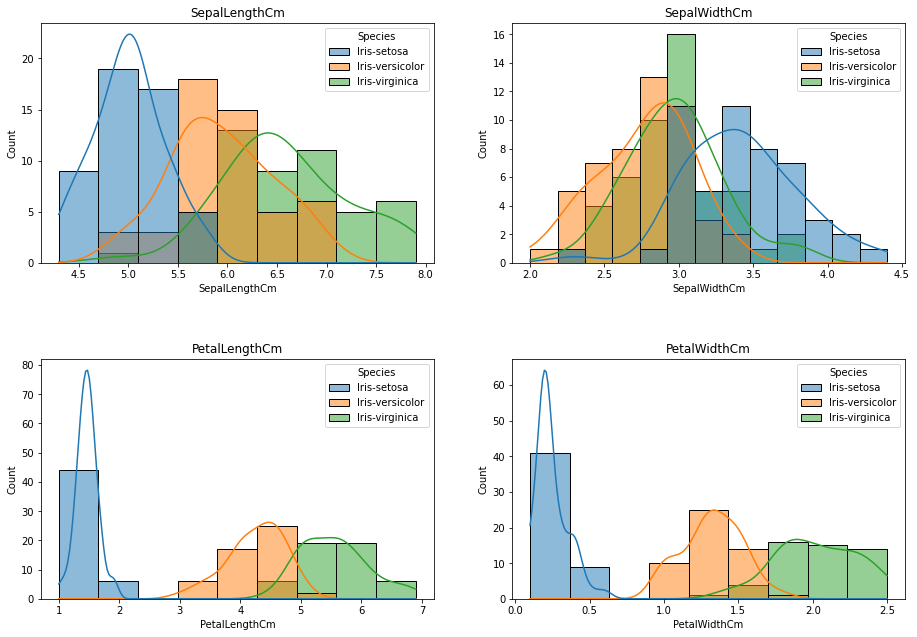

In [5]:
fig, axes = plt.subplots(2, 2)
sns.histplot(x="SepalLengthCm", data=df, kde=True, hue='Species', ax=axes[0][0]).set_title('SepalLengthCm')
sns.histplot(x="SepalWidthCm", data=df, kde=True, hue='Species', ax=axes[0][1]).set_title('SepalWidthCm')
sns.histplot(x="PetalLengthCm", data=df, kde=True, hue='Species', ax=axes[1][0]).set_title('PetalLengthCm')
sns.histplot(x="PetalWidthCm", data=df, kde=True, hue='Species', ax=axes[1][1]).set_title('PetalWidthCm')
plt.subplots_adjust(left=1, right=3, top=3, bottom=1, hspace=0.4)

#### Observation: 
#### Sepal Length: Iris-setosa < Iris-versicolor< Iris-virginica
#### Sepal Width: Iris-versicolor<= Iris-virginica < Iris-setosa
#### Petal Length: Iris-setosa < Iris-versicolor< Iris-virginica
#### Petal Width: Iris-setosa < Iris-versicolor< Iris-virginica

Text(0.5, 1.0, 'Species count')

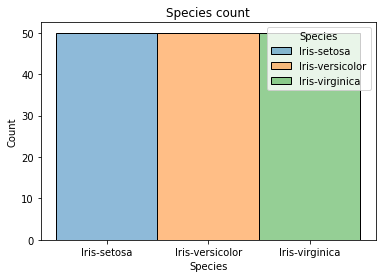

In [6]:
sns.histplot(x='Species', data=df, hue='Species').set_title('Species count')

#### Observation: There are equal no. of rows for each Species category in the dataset.

### Boxplots

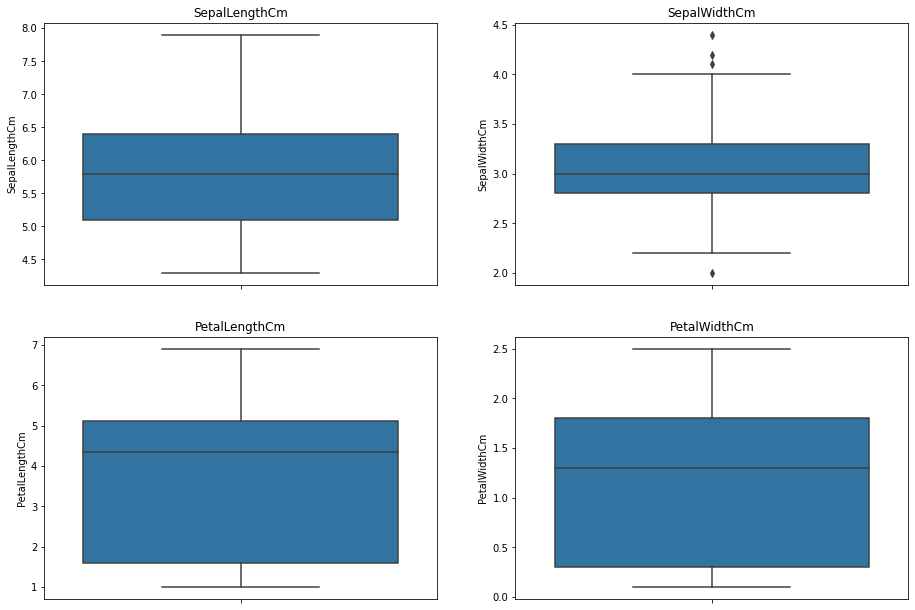

In [7]:
fig, axes = plt.subplots(2, 2)
sns.boxplot(y=df['SepalLengthCm'], ax=axes[0][0]).set_title('SepalLengthCm')
sns.boxplot(y=df['SepalWidthCm'], ax=axes[0][1]).set_title('SepalWidthCm')
sns.boxplot(y=df['PetalLengthCm'], ax=axes[1][0]).set_title('PetalLengthCm')
sns.boxplot(y=df['PetalWidthCm'], ax=axes[1][1]).set_title('PetalWidthCm')
plt.subplots_adjust(left=1, right=3, top=3, bottom=1)

#### Observation: There are outliers for SepalWidthCm.

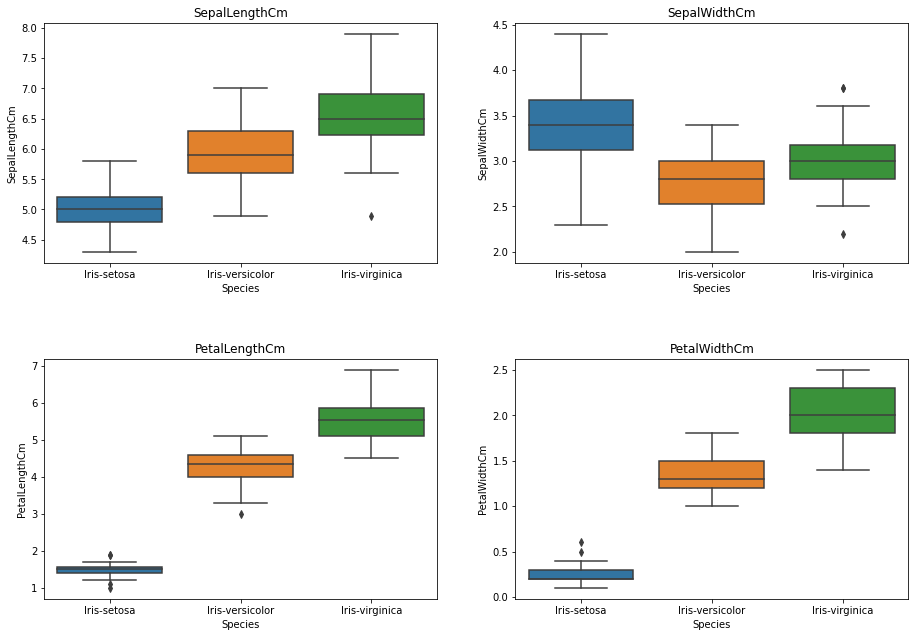

In [8]:
fig, axes = plt.subplots(2, 2)
sns.boxplot(y=df['SepalLengthCm'], x=df['Species'], ax=axes[0][0]).set_title('SepalLengthCm')
sns.boxplot(y=df['SepalWidthCm'], x=df['Species'], ax=axes[0][1]).set_title('SepalWidthCm')
sns.boxplot(y=df['PetalLengthCm'], x=df['Species'], ax=axes[1][0]).set_title('PetalLengthCm')
sns.boxplot(y=df['PetalWidthCm'], x=df['Species'], ax=axes[1][1]).set_title('PetalWidthCm')
plt.subplots_adjust(left=1, right=3, top=3, bottom=1, hspace=0.4)

#### Observation: There are some outliers for each Species.

### Checking Outliers

In [9]:
SepalWidthCm_Q1 = df['SepalWidthCm'].quantile(0.25) #First quartile
SepalWidthCm_Q3 = df['SepalWidthCm'].quantile(0.75) #Third quartile
SepalWidthCm_IQR = SepalWidthCm_Q3 - SepalWidthCm_Q1 #Inter quartile range
SepalWidthCm_lower_limit = SepalWidthCm_Q1 - 1.5 * SepalWidthCm_IQR
SepalWidthCm_upper_limit = SepalWidthCm_Q3 + 1.5 * SepalWidthCm_IQR
SepalWidthCm_lower_limit, SepalWidthCm_upper_limit

(2.05, 4.05)

In [10]:
df_without_outliers = df[(df['SepalWidthCm']>SepalWidthCm_lower_limit) & (df['SepalWidthCm']<SepalWidthCm_upper_limit)]
df_without_outliers

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[146 rows x 6 columns]

#### Observation: There are 4 outlier values for SepalWidthCm.

### Pairplot

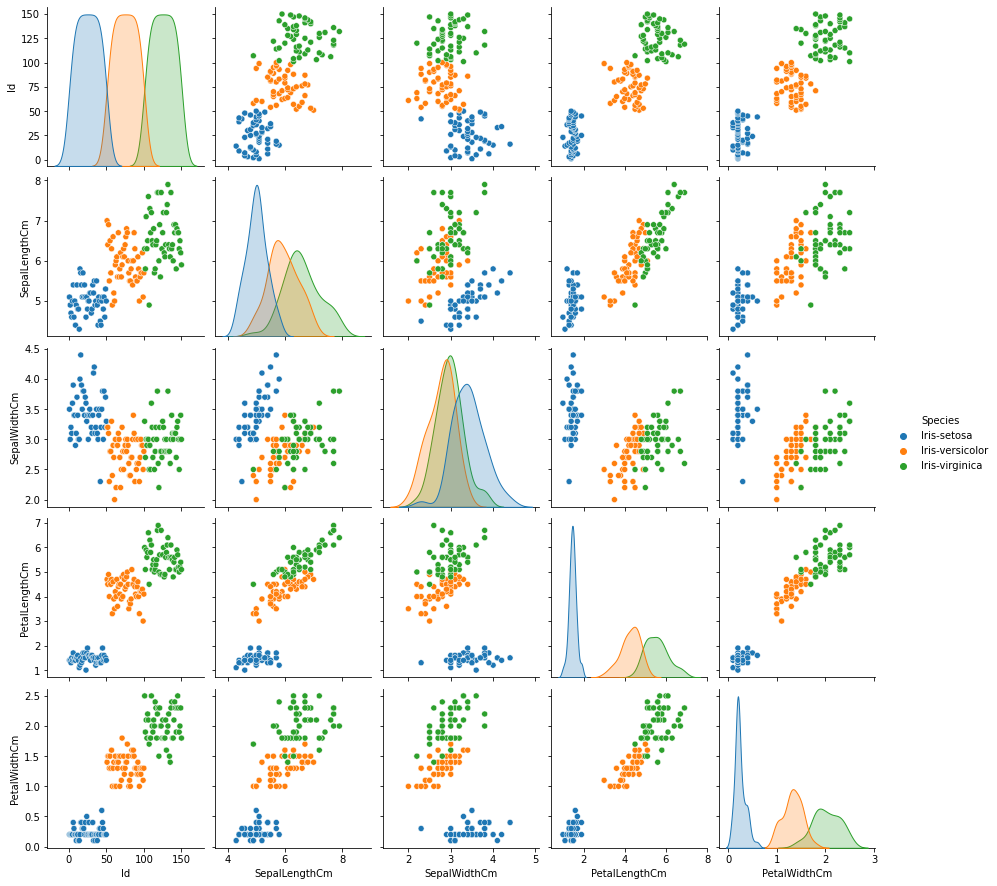

In [11]:
sns.pairplot(data=df, hue='Species')

#### Observations:
#### 1. Iris-setosa has smaller sepal lengths but larger sepal widths.
#### 2. Iris-versicolor lies in the middle of the other two species in terms of sepal length and width.
#### 3. Iris-virginica has larger sepal lengths but smaller sepal widths.
#### 4. Iris-setosa has smaller petal lengths and widths.
#### 5. Iris-versicolor lies in the middle of the other two species in terms of petal length and width.
#### 6. Iris-virginica has the largest of petal lengths and widths.

## Naive Bayes Classifier

In [12]:
# Assigning dependent & independent variables
X = df.iloc[:, 1:5].values
y = df['Species'].values

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Training the Naive Bayes Classification model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype='<U15')

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]], dtype=int64)

Confusion Matrix
[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]


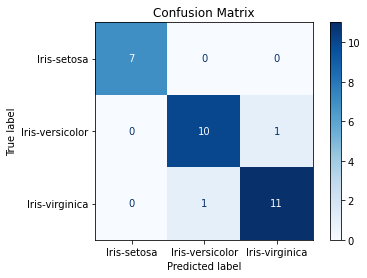

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    cmap=plt.cm.Blues
)
disp.ax_.set_title("Confusion Matrix")
print("Confusion Matrix")
print(disp.confusion_matrix)

In [19]:
# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9333333333333333


In [20]:
cm = disp.confusion_matrix

TP_setosa = cm[0][0]
TN_setosa = cm[1][1]+cm[2][2]+cm[1][2]+cm[2][1]
FP_setosa = cm[1][0]+cm[2][0]
FN_setosa = cm[0][1]+cm[0][2]

TP_versicolor = cm[1][1]
TN_versicolor = cm[0][1]+cm[0][2]+cm[2][0]+cm[2][2]
FP_versicolor = cm[0][1]+cm[2][1]
FN_versicolor = cm[1][0]+cm[1][2]

TP_virginica = cm[2][2]
TN_virginica = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
FP_virginica = cm[0][2]+cm[1][2]
FN_virginica = cm[2][0]+cm[2][1]

accuracy_setosa = (TP_setosa+TN_setosa)/(TP_setosa+FN_setosa+TN_setosa+FP_setosa)
error_rate_setosa = 1 - accuracy_setosa
precision_setosa = TP_setosa/(TP_setosa+FP_setosa)
recall_setosa = TP_setosa/(TP_setosa+FN_setosa)

accuracy_versicolor = (TP_versicolor+TN_versicolor)/(TP_versicolor+FN_versicolor+TN_versicolor+FP_versicolor)
error_rate_versicolor = 1 - accuracy_versicolor
precision_versicolor = TP_versicolor/(TP_versicolor+FP_versicolor)
recall_versicolor = TP_versicolor/(TP_versicolor+FN_versicolor)

accuracy_virginica = (TP_virginica+TN_virginica)/(TP_virginica+FN_virginica+TN_virginica+FP_virginica)
error_rate_virginica = 1 - accuracy_virginica
precision_virginica = TP_virginica/(TP_virginica+FP_virginica)
recall_virginica = TP_virginica/(TP_virginica+FN_virginica)

print("Iris-setosa")
print("Accuracy : ", accuracy_setosa)
print("Error Rate : ", error_rate_setosa)
print("Precision : ", precision_setosa)
print("Recall : ", recall_setosa)

print("\nIris-versicolor")
print("Accuracy : ", accuracy_versicolor)
print("Error Rate : ", error_rate_versicolor)
print("Precision : ", precision_versicolor)
print("Recall : ", recall_versicolor)

print("\nIris-virginica")
print("Accuracy : ", accuracy_virginica)
print("Error Rate : ", error_rate_virginica)
print("Precision : ", precision_virginica)
print("Recall : ", recall_virginica)

Iris-setosa
Accuracy :  1.0
Error Rate :  0.0
Precision :  1.0
Recall :  1.0

Iris-versicolor
Accuracy :  0.9130434782608695
Error Rate :  0.08695652173913049
Precision :  0.9090909090909091
Recall :  0.9090909090909091

Iris-virginica
Accuracy :  0.9333333333333333
Error Rate :  0.06666666666666665
Precision :  0.9166666666666666
Recall :  0.9166666666666666
